In [ ]:
"""
packages necessaires:

numpy
random
numpy and random sont utiles seulement pour générer des points aléatoires
"""
import random
from random import shuffle, randint
import numpy as np


In [ ]:
"""
packages necessaires:

matplotlib
basemap: http://matplotlib.org/basemap/users/installing.html
shapely: https://pypi.python.org/pypi/Shapely
descartes: https://pypi.python.org/pypi/descartes
"""

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
# conda install -c conda-forge basemap-data-hires 
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint, MultiPolygon
from descartes import PolygonPatch


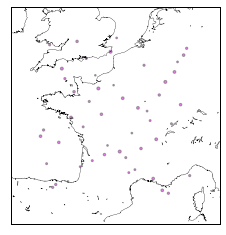

In [2]:

# point min bas-gauche minx miny, point max haut-droite sur la carte
bounds = [-4.838398, 42.61071, 8.259922, 51.864716]
minx, miny, maxx, maxy = bounds
w, h = maxx - minx, maxy - miny

# generation de points au hasard dans les limites définies
lon = np.linspace(minx, maxx).tolist()
lat = np.linspace(miny, maxy).tolist()
random.shuffle(lon)
random.shuffle(lat)

# creation d'une nouvelle figure matplotlib avec des axes (instance)
fig = plt.figure()
ax = fig.add_subplot(111)

# ajout d'un fond de carte légèrement étendue
m = Basemap(
    projection='merc',
    ellps = 'WGS84',
    llcrnrlon=minx - 0.2 * w,
    llcrnrlat=miny - 0.2 * h,
    urcrnrlon=maxx + 0.2 * w,
    urcrnrlat=maxy + 0.2 * h,
    lat_ts=0,
    resolution='h')
m.drawcoastlines(linewidth=0.3)
m.drawmapboundary()
# un shapefile peuevnt etre ajouté si besoin
# m.readshapefile('france_shp', 'france', color='#555555')

#réglages des limites des axes au système de coordonnées de référence de basemap
min_x, min_y = m(minx, miny)
max_x, max_y = m(maxx, maxy)
corr_w, corr_h = max_x - min_x, max_y - min_y
ax.set_xlim(min_x - 0.2 * corr_w, max_x + 0.2 * corr_w)
ax.set_ylim(min_y - 0.2 * corr_h, max_y + 0.2 * corr_h)
# square up axes and basemap
ax.set_aspect(1)
# buffer units are translated to metres by Basemap
# we're randomly varying between 7.5k and 15k metres
patches = [PolygonPatch(Point(m(lon, lat)).buffer(1.0 * randint(7500, 15000)),
                        fc='#cc00cc', ec='#555555', alpha=0.5, zorder=4)
           for lon, lat in zip(lon, lat)]

ax.add_collection(PatchCollection(patches, match_original=True))
plt.savefig('data/fr.png', dpi=300)
plt.show()